In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec betapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,1.8474,2.5496,3.3057,0.79513,0.65809,1.124,2.5383,3.4095,0.65106,0.74514,...,0.065345,1.9741,4.0469,0.077726,1.7905,0.37865,0.055707,0.74315,4.4329,1
0,2.4707,3.1008,4.1147,1.09190,0.71181,0.66584,3.5061,3.6547,0.96855,0.39665,...,0.086079,1.7638,3.2739,0.095156,1.9786,0.37815,0.049532,0.95852,3.4237,1
1,1.6760,2.5235,3.5537,0.58044,0.72842,0.67869,2.6074,4.0847,0.53950,0.58255,...,0.046609,1.5890,4.2457,0.052856,2.1995,0.35764,0.078322,1.16530,4.2531,1
2,3.1808,3.3740,3.2831,0.53835,0.57345,0.89629,2.0811,2.5790,0.39929,0.72357,...,0.071118,1.9235,3.1815,0.079113,1.9122,0.36863,0.037173,1.02140,2.9841,1
3,2.0524,1.7429,2.8583,0.79286,0.76093,1.05520,3.4418,4.5708,0.64689,0.82814,...,0.036364,2.6893,6.3835,0.087593,3.3852,0.28269,0.085119,0.56311,3.9294,1
4,3.1339,2.8519,2.7088,0.28756,0.55268,0.69743,1.5512,1.6374,0.42841,0.47238,...,0.042500,1.1942,2.0283,0.058093,1.8887,0.38917,0.076706,0.64049,2.3733,1




**Labelling COLUMNS**

In [3]:
print(df.columns)

Index(['1.8474', '2.5496', '3.3057', '0.79513', '0.65809', '1.124', '2.5383',
       '3.4095', '0.65106', '0.74514', '1.1123', '3.1651', '0.6468', '0.87493',
       '3.3942', '0.36758', '0.057015', '0.96547', '2.4596', '0.50809',
       '0.27792', '0.026584', '2.5434', '9.0592', '0.74766', '0.8476',
       '2.4937', '7.2495', '0.6375', '0.72856', '0.89065', '2.8962', '0.66011',
       '0.84083', '2.9789', '2.606', '0.065345', '1.9741', '4.0469',
       '0.077726', '1.7905', '0.37865', '0.055707', '0.74315', '4.4329', '1'],
      dtype='object')


In [4]:
new_names = {'0.49674':'a', '0.27869':'b', '0.36769':'c', '0.15285':'cd', '0.1606':'d','0.1328':'de','0.17606':'e','0.3842':'f','0.19877':'g',
       '0.17507':'l', '0.10564':'m', '0.3156':'n', '0.14643':'o', '0.10827':'p','1.2166':'q', '0.073472':'r',
       '0.037876':'s', '0.26714':'t', '0.49989':'u', '0.094403':'v', '0.037798':'w', '0.0073178':'x', '0.6007':'y',
       '2.22':'z', '0.13759':'aa', '0.22783':'bb', '2.3247':'cc', '3.8245':'dd', '0.16294':'ee',
       '2.7036':'ff', '0.18483':'gg', '0.16376':'hh', '0.13955':'ii', '0.16332':'jj', '0.21231':'kk',
       '0.85415':'ll', '0.026382':'mm', '0.47723':'nn', '0.49575':'oo', '0.020878':'pp', '0.56216':'qq',
       '0.072675':'rr','0.012301':'j','0.14811':'ss','0.17573':'tt','1.3432':'uu','0.17928':'vv','0.10368':'ww','0.15127':'xx',
       '0.20969':'k','0.96803':'h','1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
1.8474      8391 non-null float64
2.5496      8391 non-null float64
3.3057      8391 non-null float64
0.79513     8391 non-null float64
0.65809     8391 non-null float64
1.124       8391 non-null float64
2.5383      8391 non-null float64
3.4095      8391 non-null float64
0.65106     8391 non-null float64
0.74514     8391 non-null float64
1.1123      8391 non-null float64
3.1651      8391 non-null float64
0.6468      8391 non-null float64
0.87493     8391 non-null float64
3.3942      8391 non-null float64
0.36758     8391 non-null float64
0.057015    8391 non-null float64
0.96547     8391 non-null float64
2.4596      8391 non-null float64
0.50809     8391 non-null float64
0.27792     8391 non-null float64
0.026584    8391 non-null float64
2.5434      8391 non-null float64
9.0592      8391 non-null float64
0.74766     8391 non-null float64
0.8476      8391 non-null float64
2.4937      83

In [6]:
pd.set_option('display.max_columns', None)
print(df.describe())



            1.8474       2.5496       3.3057      0.79513      0.65809  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      5.229256     4.581593     5.113527    11.637879     5.828835   
std       5.455699     5.227413     5.554233    27.871367     7.628745   
min       0.488380     0.165730     0.435770     0.216740     0.197270   
25%       2.487700     1.885600     2.488900     3.288450     2.137500   
50%       3.754900     3.088600     3.760900     6.755200     3.615200   
75%       5.965750     5.335400     6.005500    11.739000     6.450550   
max     114.150000   182.100000   170.890000  1195.000000   246.470000   

             1.124       2.5383       3.4095      0.65106      0.74514  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      5.131929     6.722141    12.008532    10.589621     4.569252   
std       6.133803    13.013718    48.352535    29.672747     5.511620   
min       0.231350     0.483770     0

***spliting the file in the data and target class***

In [7]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [8]:

print(data)
print(target)

[[2.4707, 3.1008, 4.1147, 1.0919, 0.71181, 0.66584, 3.5061, 3.6547, 0.96855, 0.39665, 0.68786, 3.6175, 0.67855, 0.4503, 2.3139, 0.39513000000000004, 0.048856000000000004, 0.98456, 2.3968, 0.63283, 0.2601, 0.08329500000000001, 2.097, 6.7288, 0.8712700000000001, 0.70234, 3.7587, 6.436, 0.9146799999999999, 0.5615899999999999, 0.6268699999999999, 3.4086, 0.6882699999999999, 0.52227, 3.6962, 3.4658, 0.086079, 1.7638, 3.2739, 0.09515599999999999, 1.9786, 0.37815, 0.049532, 0.95852, 3.4237], [1.676, 2.5235, 3.5537, 0.58044, 0.72842, 0.67869, 2.6074, 4.0847, 0.5395, 0.58255, 0.82586, 3.5129, 0.58521, 0.76858, 2.8055, 0.41528999999999994, 0.061982, 1.0732, 2.86, 0.52941, 0.21650999999999998, 0.050575999999999996, 2.2548, 7.593, 0.60048, 0.5957, 3.0615, 8.9201, 0.46166, 0.52858, 0.69555, 3.1139, 0.5847, 0.75417, 3.1051, 3.465, 0.046609, 1.589, 4.2457, 0.05285599999999999, 2.1995, 0.35764, 0.078322, 1.1653, 4.2531], [3.1808, 3.3739999999999997, 3.2831, 0.53835, 0.57345, 0.8962899999999999, 2.0811

**heatmap**

Text(0.5, 1, 'Correlation of Variables')

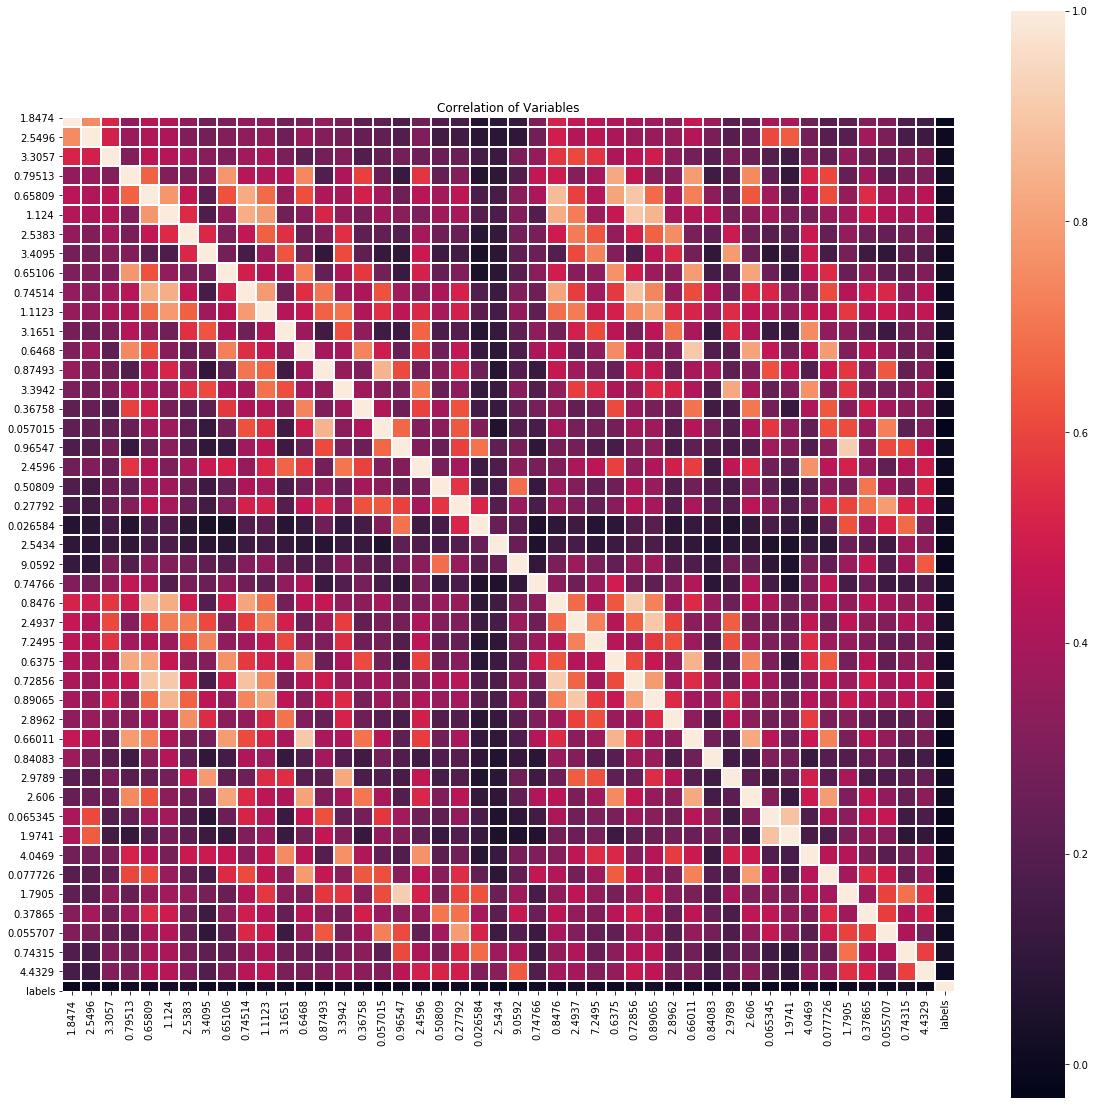

In [9]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [11]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [12]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [13]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

        1.8474    2.5496    3.3057   0.79513   0.65809     1.124    2.5383  \
1585 -0.704393 -0.648984 -0.544477 -0.172409 -0.499763 -0.452277 -0.409348   
992   1.089735  1.266852  0.315230 -0.175264  0.095827  0.186543  0.035079   
8204 -0.312728 -0.551935 -0.668391 -0.082287 -0.274430 -0.142551 -0.107121   
4674 -0.740344 -0.697548 -0.286404 -0.323399 -0.461296 -0.299094  0.019298   
3593 -0.526019 -0.516390 -0.644418 -0.069662 -0.155176 -0.110209 -0.208143   

        3.4095   0.65106   0.74514    1.1123    3.1651    0.6468   0.87493  \
1585 -0.224406 -0.222291 -0.437827 -0.369838 -0.313564 -0.168802 -0.358422   
992  -0.117611 -0.111334  0.871970  0.304838 -0.160949  0.164129  0.788301   
8204 -0.146851 -0.164145 -0.054605 -0.170290 -0.180806 -0.141512 -0.192981   
4674 -0.078842 -0.272849 -0.409093 -0.283618  0.138537 -0.313176 -0.358398   
3593 -0.053528 -0.049057  0.061193 -0.193191 -0.220228  0.151731 -0.305296   

        3.3942   0.36758  0.057015   0.96547    2.4596   0.508

**Normalize Testing Data by using mean and SD of training set**

In [14]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

        1.8474    2.5496    3.3057   0.79513   0.65809     1.124    2.5383  \
1585 -0.704393 -0.648984 -0.544477 -0.172409 -0.499763 -0.452277 -0.409348   
992   1.089735  1.266852  0.315230 -0.175264  0.095827  0.186543  0.035079   
8204 -0.312728 -0.551935 -0.668391 -0.082287 -0.274430 -0.142551 -0.107121   
4674 -0.740344 -0.697548 -0.286404 -0.323399 -0.461296 -0.299094  0.019298   
3593 -0.526019 -0.516390 -0.644418 -0.069662 -0.155176 -0.110209 -0.208143   

        3.4095   0.65106   0.74514    1.1123    3.1651    0.6468   0.87493  \
1585 -0.224406 -0.222291 -0.437827 -0.369838 -0.313564 -0.168802 -0.358422   
992  -0.117611 -0.111334  0.871970  0.304838 -0.160949  0.164129  0.788301   
8204 -0.146851 -0.164145 -0.054605 -0.170290 -0.180806 -0.141512 -0.192981   
4674 -0.078842 -0.272849 -0.409093 -0.283618  0.138537 -0.313176 -0.358398   
3593 -0.053528 -0.049057  0.061193 -0.193191 -0.220228  0.151731 -0.305296   

        3.3942   0.36758  0.057015   0.96547    2.4596   0.508

**Support vector machine**

In [15]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
def svm_classifier(): 
    file_x = '45 channel 1sec gamamapower.csv'
    file_y = 'Label.csv'
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2835   84]
 [2019   97]]
Accuracy score : 
58.23237338629593


**sequential model**

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [18]:
model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/25
5873/5873 [==============================] - 1s 95us/step - loss: 1.0973 - acc: 0.5348
Epoch 2/25
5873/5873 [==============================] - 0s 28us/step - loss: 0.8156 - acc: 0.5592
Epoch 3/25
5873/5873 [==============================] - 0s 28us/step - loss: 0.7405 - acc: 0.5910
Epoch 4/25
5873/5873 [==============================] - 0s 29us/step - loss: 0.7271 - acc: 0.6123
Epoch 5/25
5873/5873 [==============================] - 0s 31us/step - loss: 0.7021 - acc: 0.6223
Epoch 6/25
5873/5873 [==============================] - 0s 29us/step - loss: 0.6771 - acc: 0.6499
Epoch 7/25
5873/5873 [==============================] - 0s 34us/step - loss: 0.6594 - acc: 0.6676
Epoch 8/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.6373 - acc: 0.6991
Epoch 9/25
5873/5873 [==============================] - 0s 25us/step - loss: 0.6083 - acc: 0.7226
Epoch 10/25
5873/5873 [==============================] - 0s 34us/step - loss: 0.5753 - acc: 0.7552
Epoch 11/25
5873/58

**LSTM MODELLING**

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1500

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=20, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=20)

Epoch 1/10
5873/5873 [==============================] - 31s 5ms/step - loss: 0.0432 - acc: 0.9867
Epoch 2/10
5873/5873 [==============================] - 29s 5ms/step - loss: 2.5274e-07 - acc: 1.0000
Epoch 3/10
5873/5873 [==============================] - 30s 5ms/step - loss: 1.2635e-07 - acc: 1.0000
Epoch 4/10
5873/5873 [==============================] - 33s 6ms/step - loss: 1.1402e-07 - acc: 1.0000
Epoch 5/10
5873/5873 [==============================] - 44s 8ms/step - loss: 1.1373e-07 - acc: 1.0000
Epoch 6/10
5873/5873 [==============================] - 42s 7ms/step - loss: 1.1141e-07 - acc: 1.0000
Epoch 7/10
5873/5873 [==============================] - 43s 7ms/step - loss: 1.1004e-07 - acc: 1.0000
Epoch 8/10
5873/5873 [==============================] - 44s 7ms/step - loss: 1.1111e-07 - acc: 1.0000
Epoch 9/10
5873/5873 [==============================] - 49s 8ms/step - loss: 1.0957e-07 - acc: 1.0000
Epoch 10/10
2518/2518 [==============================] - 4s 2ms/step
